## a)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import statsmodels.formula.api as smf
import pingouin as pg

In [2]:
# read data set
power = pd.read_excel('power.xlsx')
power.head()

,Energie,Temperatur,Tage,Reinheit,Menge
0,240,25,24,91,100
1,236,31,21,90,98
2,290,45,24,88,110
3,274,60,25,87,88
4,301,65,25,91,94


In [3]:
model = smf.ols('Energie ~ Temperatur + Tage + Reinheit + Menge', data=power).fit()
model.summary()

/opt/miniconda3/envs/statistik/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Energie   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     5.107
Date:                Fri, 12 Sep 2025   Prob (F-statistic):             0.0303
Time:                        13:10:58   Log-Likelihood:                -46.744
No. Observations:                  12   AIC:                             103.5
Df Residuals:                       7   BIC:                             105.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -103.9973    209.778     -0.496      0.635    -600.043     392.049
Temperatur     0.6046      0.370      1.636      0.146      -0.269       1.479
Tage           8.9489      5.359      1.670      0.139      -3.723      21.621
Reinheit       1.4299      2.403      0.595      0.571      -4.252       7.112
Menge          0.0275      0.759      0.036      0.972      -1.767       1.822
==============================================================================
Omnibus:                        0.016   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.220
Skew:                          -0.057   Prob(JB):                        0.896
Kurtosis:                       2.346   Cond. No.                     6.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

None of the variables has a significant individual effect, yet the coefficient of determination is relatively high.

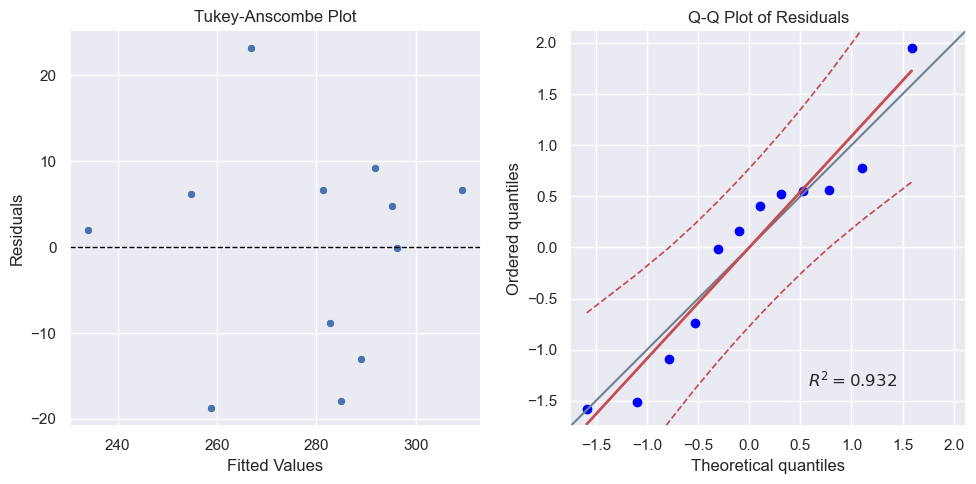

In [4]:
import pingouin as pg

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Tukey-Anscombe plot
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=ax[0])
ax[0].axhline(0, color='black', linestyle='--', linewidth=1)
ax[0].set_xlabel("Fitted Values")
ax[0].set_ylabel("Residuals")
ax[0].set_title("Tukey-Anscombe Plot")

# Q-Q plot of residuals
pg.qqplot(model.resid, ax=ax[1])
ax[1].set_title("Q-Q Plot of Residuals")

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

The plot doesn't look too bad, although it's difficult to assess with only 12 observations.

## b) Prediction

In [5]:
NewData = pd.DataFrame({"Intercept": [1],
                        "Temperatur": [75],
                        "Tage": [24],
                        "Reinheit": [90],
                        "Menge": [98]})
print(NewData)

   Intercept  Temperatur  Tage  Reinheit  Menge
0          1          75    24        90     98


In [6]:
model.predict(NewData)

0    287.509582
dtype: float64

In [7]:
# alternatively 'by hand':
NewData.dot(model.params)

0    287.509582
dtype: float64

In [8]:
# alternatively, truly 'by hand':
b = model.params
NewY = b.iloc[0] + b.iloc[1]*NewData.iloc[0,1] + b.iloc[2]*NewData.iloc[0,2] + b.iloc[3]*NewData.iloc[0,3] + b.iloc[4]*NewData.iloc[0,4]
NewY

287.50958228056595